
#Oasis Infobyte Internship – Task 2  
## Unemployment Rate Analysis in India

**Domain:** Data Science  

**Internship Platform:** Oasis Infobyte  

---

## Aim  
The aim of this project is to analyze unemployment trends in India and understand how the COVID-19 pandemic affected employment across different states.

## Why this Project?  
Unemployment rate is a key economic indicator. During COVID-19, India witnessed a sudden rise in unemployment due to lockdowns and economic slowdown. By analyzing this data, we can identify affected regions and trends over time.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




#Upload Dataset  



In [ ]:

data = pd.read_csv('/content/Unemployment in India.csv')
data.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural



## Step 2: Data Exploration  
Understanding the structure and quality of the dataset.


In [ ]:
df = data
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


Dataset Shape: (768, 7)

Column Names: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Missing Values:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000



## Step 3: Data Cleaning  

**Dataset Overview**

Check the structure, size, and basic information of the dataset.


In [ ]:
df.columns = [
    'State', 'Date', 'Frequency', 'Unemployment_Rate',
    'Employed', 'Labour_Participation_Rate', 'Area'
]

df.head()


,State,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)


Dataset Shape: (740, 7)

Column Names:
 Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB



## Step 4: Check Missing Values

Verify whether the dataset contains missing values.



In [ ]:
df.isnull().sum()


,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


#Convert Date Column

Convert the Date column into datetime format for time-based analysis.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.dtypes


/tmp/ipython-input-3366257273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


,0
State,object
Date,datetime64[ns]
Frequency,object
Unemployment_Rate,float64
Employed,float64
Labour_Participation_Rate,float64
Area,object



## Step 5: Statistical Summary
Understand the statistical distribution of numerical features.

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57



## Step 6: Correlation Analysis

Analyzing relationships between numerical features using a heatmap.

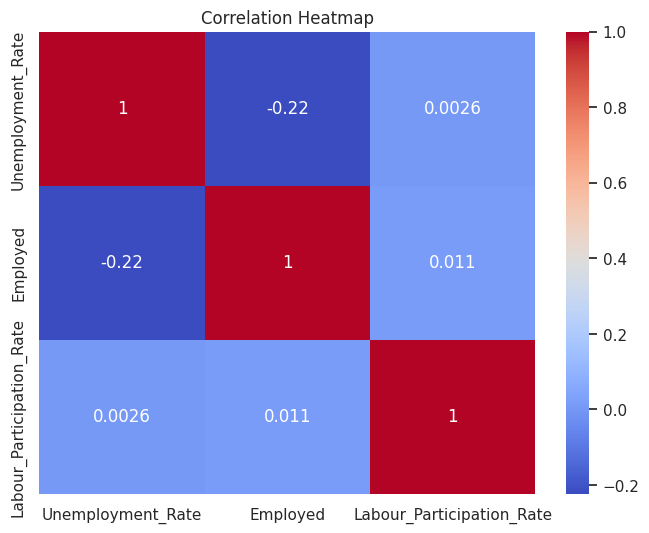

In [ ]:
corr = df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



#Step 7: State-wise Average Unemployment Rate

Visualize average unemployment rate across states.

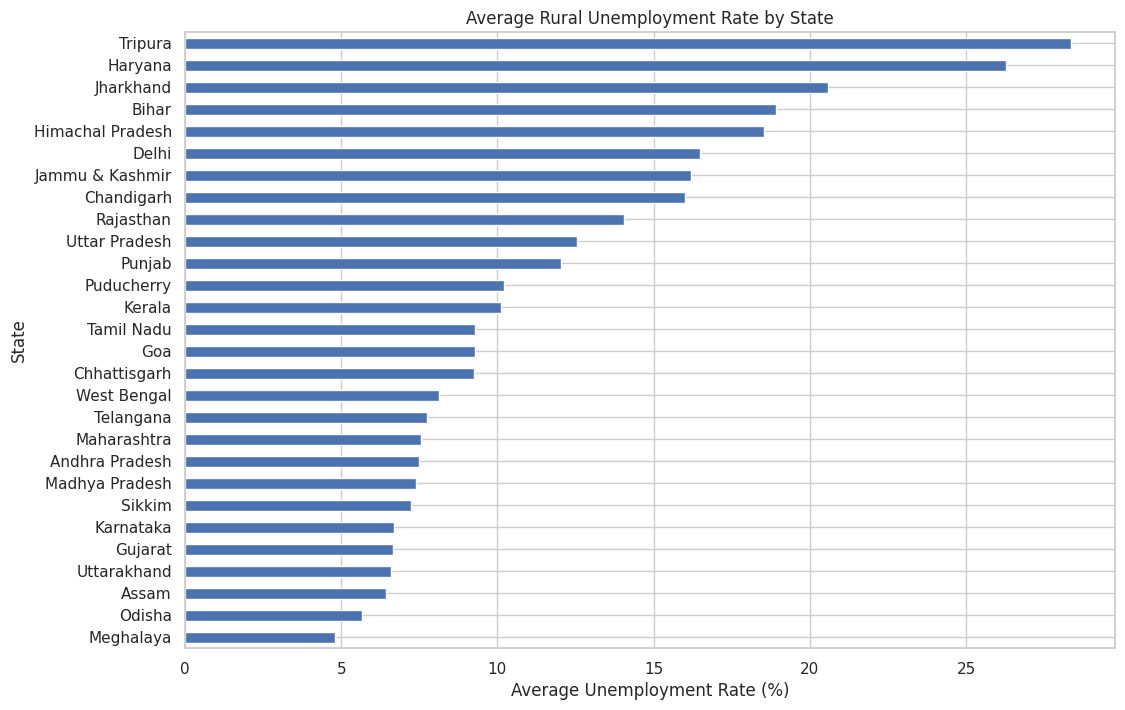

In [ ]:
state_avg = df.groupby('State')['Unemployment_Rate'].mean().sort_values()

plt.figure(figsize=(12,8))
state_avg.plot(kind='barh')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State')
plt.title('Average Rural Unemployment Rate by State')
plt.show()



#Step 8: Monthly Unemployment Trend (COVID Impact)

Analyzing how unemployment changed over time.

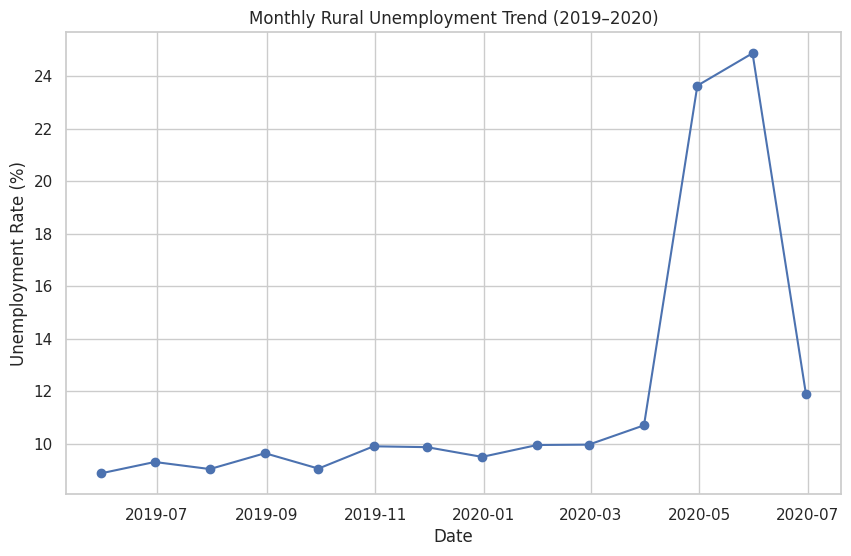

In [ ]:
monthly_trend = df.groupby('Date')['Unemployment_Rate'].mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_trend, marker='o')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Monthly Rural Unemployment Trend (2019–2020)')
plt.grid(True)
plt.show()


#Step 9: Top 10 States with Highest Unemployment

Identify states most affected by unemployment.

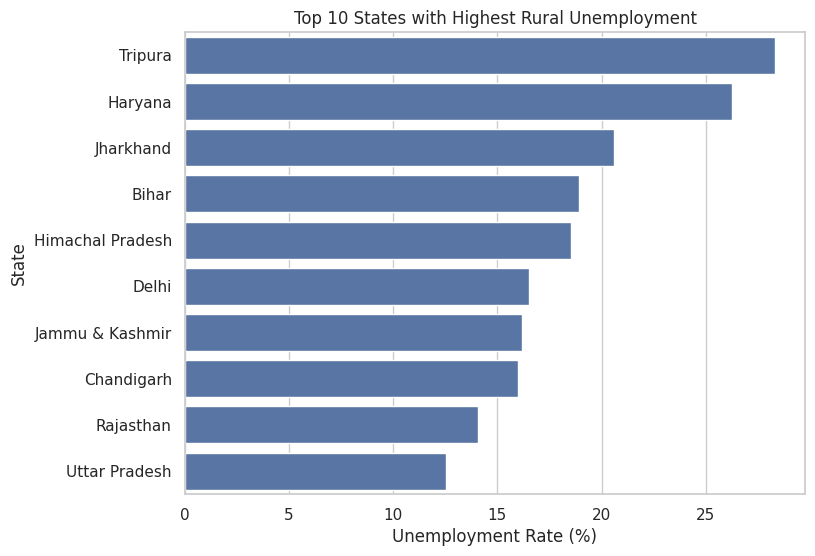

In [ ]:
top_states = state_avg.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.xlabel('Unemployment Rate (%)')
plt.title('Top 10 States with Highest Rural Unemployment')
plt.show()


#Step 10: Interactive Visualization

Creating an interactive unemployment trend using Plotly

In [ ]:
fig = px.line(
    df,
    x='Date',
    y='Unemployment_Rate',
    color='State',
    title='Rural Unemployment Trend by State'
)
fig.show()


#Final Visual Summary of Unemployment Rate

In [ ]:
import pandas as pd
import plotly.express as px

# Load CSV
df = pd.read_csv('/content/Unemployment in India.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Check column names
print(df.columns)

# Aggregate: take average unemployment rate per Area and Region
unemployment_agg = df.groupby(['Area', 'Region'], as_index=False)['Estimated Unemployment Rate (%)'].mean()

# Sunburst plot
fig = px.sunburst(
    unemployment_agg,
    path=['Area', 'Region'],
    values='Estimated Unemployment Rate (%)',
    color='Estimated Unemployment Rate (%)',
    color_continuous_scale='RdYlGn',
    width=700,
    height=700,
    title='Average Unemployment Rate in India by Area and Region'
)

fig.show()





Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')



## Conclusion  

The analysis reveals significant differences in unemployment rates across Indian states and regions. Visualizations such as bar charts, line plots, and sunburst charts help clearly understand the impact of unemployment across the country.

## Result  
The analysis successfully highlights unemployment trends and regional disparities using real-world data.


